Mounted at /content/drive
Total data rows before cleaning: 60
Total data rows after cleaning: 60
         DATE  JUMLAH KLAIM
0  2019-06-01         847.0
1  2019-07-01        1376.0
2  2019-08-01        1340.0
3  2019-09-01        1423.0
4  2019-10-01        1385.0
5  2019-11-01        1321.0
6  2019-12-01        1280.0
7  2020-01-01        1880.0
8  2020-02-01        1677.0
9  2020-03-01        1211.0
10 2020-04-01         652.0
11 2020-05-01        1067.0
12 2020-06-01        2154.0
13 2020-07-01        2819.0
14 2020-08-01        2264.0
15 2020-09-01        2558.0
16 2020-10-01        1929.0
17 2020-11-01        2199.0
18 2020-12-01        1685.0
19 2021-01-01        1998.0
20 2021-02-01        2247.0
21 2021-03-01        2354.0
22 2021-04-01        1881.0
23 2021-05-01        1590.0
24 2021-06-01        2386.0
25 2021-07-01        1793.0
26 2021-08-01        1776.0
27 2021-09-01        2029.0
28 2021-10-01        1830.0
29 2021-11-01        1916.0
30 2021-12-01        1891.0
31 2022

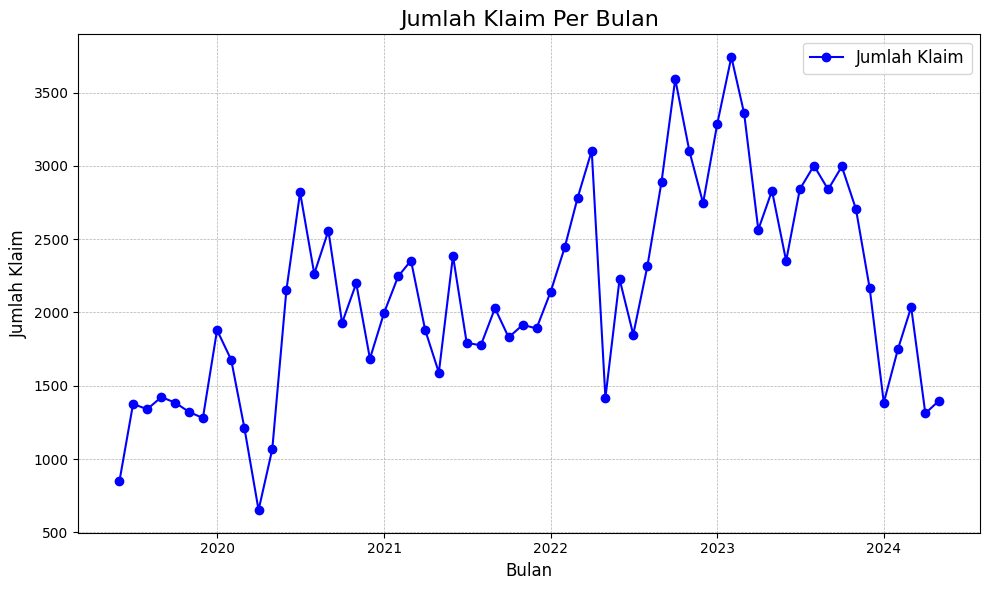

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
data_path = '/content/drive/MyDrive/DATA KLAIM JHT.csv'
data = pd.read_csv(data_path)

# Log jumlah data sebelum pembersihan
print(f"Total data rows before cleaning: {len(data)}")

# Cleaning kolom DATE
data['DATE'] = pd.to_datetime(data['DATE'], format='%m/%d/%Y', errors='coerce')

# Cleaning kolom JUMLAH KLAIM
data['JUMLAH KLAIM'] = data['JUMLAH KLAIM'].str.replace(',', '').astype(float)

# Drop baris yang tidak valid
data.dropna(inplace=True)

# Log jumlah data setelah pembersihan
print(f"Total data rows after cleaning: {len(data)}")

# Tampilkan beberapa baris untuk verifikasi
print(data.head(60))

# Tambahkan kolom 'Year-Month' untuk grup bulanan
data['Year-Month'] = data['DATE'].dt.to_period('M')

# Agregasi jumlah klaim per bulan
monthly_claims = data.groupby('Year-Month')['JUMLAH KLAIM'].sum().reset_index()

# Konversi 'Year-Month' kembali ke tipe datetime untuk visualisasi
monthly_claims['Year-Month'] = monthly_claims['Year-Month'].dt.to_timestamp()

# Visualisasi jumlah klaim per bulan
plt.figure(figsize=(10, 6))
plt.plot(monthly_claims['Year-Month'], monthly_claims['JUMLAH KLAIM'], marker='o', linestyle='-', color='b', label='Jumlah Klaim')
plt.title('Jumlah Klaim Per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Klaim', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Statistik Deskriptif Data Aktual
actual_stats = {
    'Minimum': data['JUMLAH KLAIM'].min(),
    'Maximum': data['JUMLAH KLAIM'].max(),
    'Average': data['JUMLAH KLAIM'].mean(),
    'Median': data['JUMLAH KLAIM'].median(),
    'Standard Deviation': data['JUMLAH KLAIM'].std()
}

# Menampilkan Statistik Deskriptif Data Aktual
print("Statistik Deskriptif Data Aktual:")
for stat, value in actual_stats.items():
    print(f"{stat}: {value:.2f}")

Statistik Deskriptif Data Aktual:
Minimum: 652.00
Maximum: 3743.00
Average: 2132.30
Median: 2089.00
Standard Deviation: 696.74


In [ ]:
# Split into training and testing
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Hapus kolom SMA dari Data Training dan Data Testing
train_data = train_data.drop(columns=['SMA'], errors='ignore')
test_data = test_data.drop(columns=['SMA'], errors='ignore')

# Tampilkan Data Training tanpa kolom SMA
print("\nData Training:")
print(train_data)

# Tampilkan Data Testing tanpa kolom SMA
print("\nData Testing:")
print(test_data)

# Tampilkan jumlah data
print(f"\nJumlah Data Training: {len(train_data)}")
print(f"Jumlah Data Testing: {len(test_data)}")




Data Training:
         DATE  JUMLAH KLAIM Year-Month
0  2019-06-01         847.0    2019-06
1  2019-07-01        1376.0    2019-07
2  2019-08-01        1340.0    2019-08
3  2019-09-01        1423.0    2019-09
4  2019-10-01        1385.0    2019-10
5  2019-11-01        1321.0    2019-11
6  2019-12-01        1280.0    2019-12
7  2020-01-01        1880.0    2020-01
8  2020-02-01        1677.0    2020-02
9  2020-03-01        1211.0    2020-03
10 2020-04-01         652.0    2020-04
11 2020-05-01        1067.0    2020-05
12 2020-06-01        2154.0    2020-06
13 2020-07-01        2819.0    2020-07
14 2020-08-01        2264.0    2020-08
15 2020-09-01        2558.0    2020-09
16 2020-10-01        1929.0    2020-10
17 2020-11-01        2199.0    2020-11
18 2020-12-01        1685.0    2020-12
19 2021-01-01        1998.0    2021-01
20 2021-02-01        2247.0    2021-02
21 2021-03-01        2354.0    2021-03
22 2021-04-01        1881.0    2021-04
23 2021-05-01        1590.0    2021-05
24 2021-0

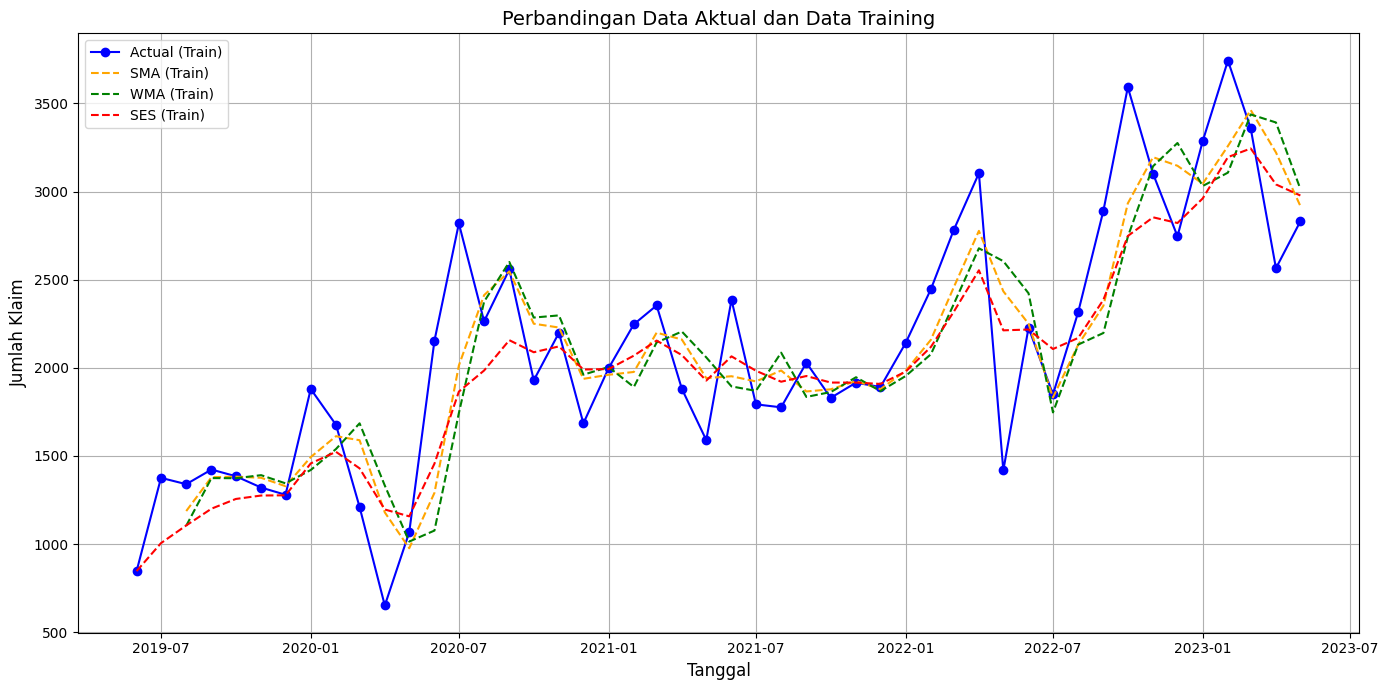

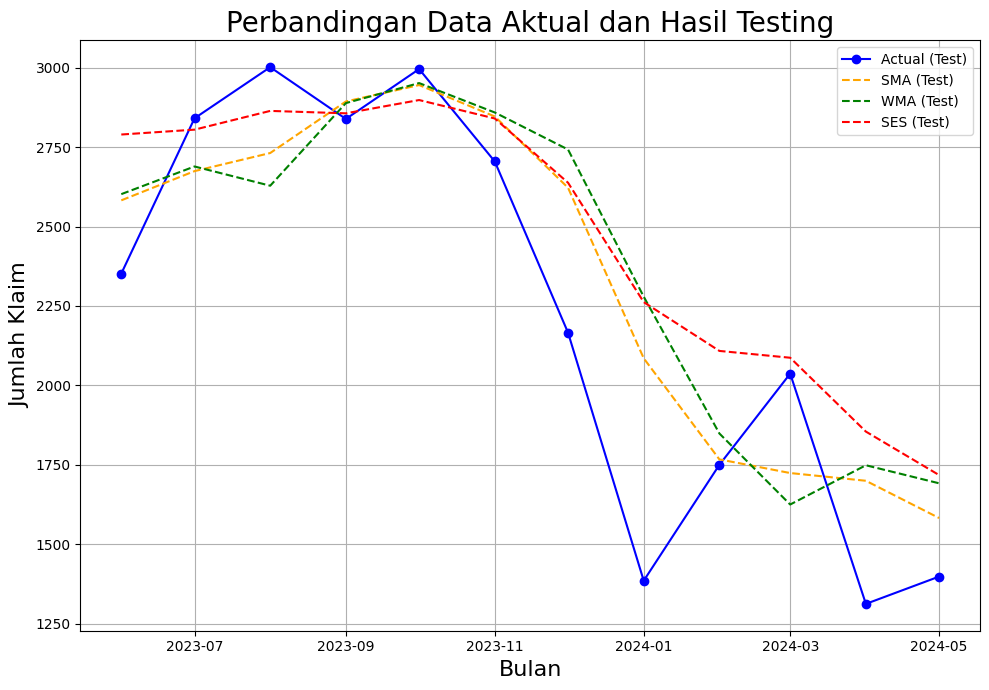

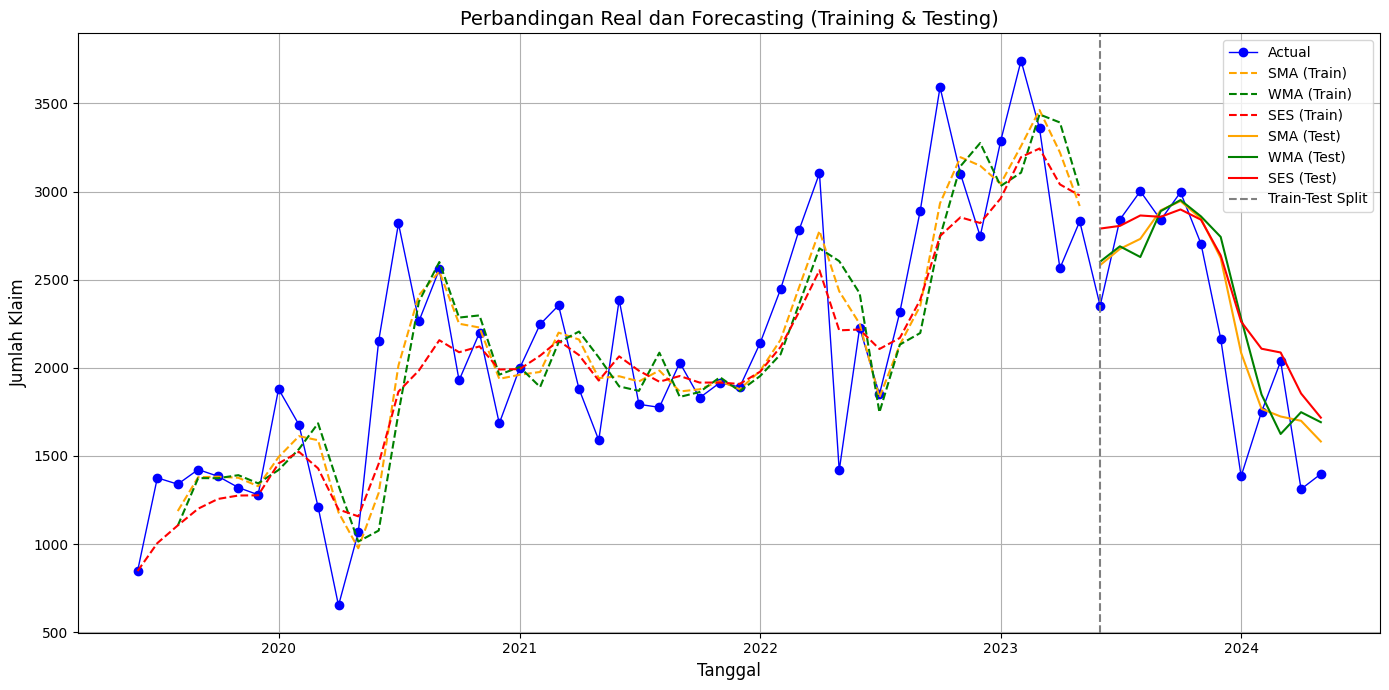

            Aktual  SMA (Forecast)  WMA (Forecast)  SES (Forecast)
Tanggal                                                           
2019-06-01   847.0             NaN             NaN      847.000000
2019-07-01  1376.0             NaN             NaN     1005.700000
2019-08-01  1340.0     1187.666667          1104.3     1105.990000
2019-09-01  1423.0     1379.666667          1374.6     1201.093000
2019-10-01  1385.0     1382.666667          1373.9     1256.265100
2019-11-01  1321.0     1376.333333          1391.2     1275.685570
2019-12-01  1280.0     1328.666667          1344.8     1276.979899
2020-01-01  1880.0     1493.666667          1420.5     1457.885929
2020-02-01  1677.0     1612.333333          1539.4     1523.620151
2020-03-01  1211.0     1589.333333          1685.3     1429.834105
2020-04-01   652.0     1180.000000          1332.2     1196.483874
2020-05-01  1067.0      976.666667          1014.5     1157.638712
2020-06-01  2154.0     1291.000000          1076.9     1456.54

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Forecasting methods
def single_moving_average(series, window):
    return series.rolling(window=window).mean()

def weighted_moving_average(series, weights):
    def apply_weights(values):
        return np.dot(values, weights) / sum(weights)
    return series.rolling(window=len(weights)).apply(lambda x: apply_weights(x), raw=True)

def single_exponential_smoothing(series, alpha):
    result = [series.iloc[0]]  # First value is the same as series
    for n in range(1, len(series)):
        result.append(alpha * series.iloc[n] + (1 - alpha) * result[n - 1])
    return pd.Series(result, index=series.index)

# Parameters
window = 3
weights = [0.5, 0.3, 0.2]
alpha = 0.3

# Training
sma_forecast_train = single_moving_average(train_data['JUMLAH KLAIM'], window)
wma_forecast_train = weighted_moving_average(train_data['JUMLAH KLAIM'], weights)
ses_forecast_train = single_exponential_smoothing(train_data['JUMLAH KLAIM'], alpha)

# Testing
sma_forecast_test = single_moving_average(data['JUMLAH KLAIM'], window)[train_size:]
wma_forecast_test = weighted_moving_average(data['JUMLAH KLAIM'], weights)[train_size:]
ses_forecast_test = single_exponential_smoothing(data['JUMLAH KLAIM'], alpha)[train_size:]

# Plot Training
plt.figure(figsize=(14, 7))
plt.plot(train_data['DATE'], train_data['JUMLAH KLAIM'], label='Actual (Train)', color='blue', marker='o')
plt.plot(train_data['DATE'], sma_forecast_train, label='SMA (Train)', color='orange', linestyle='--')
plt.plot(train_data['DATE'], wma_forecast_train, label='WMA (Train)', color='green', linestyle='--')
plt.plot(train_data['DATE'], ses_forecast_train, label='SES (Train)', color='red', linestyle='--')

plt.title("Perbandingan Data Aktual dan Data Training", fontsize=14)
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Jumlah Klaim", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Plot Testing
plt.figure(figsize=(10, 7))
plt.plot(test_data['DATE'], test_data['JUMLAH KLAIM'], label='Actual (Test)', color='blue', marker='o')
plt.plot(test_data['DATE'], sma_forecast_test, label='SMA (Test)', color='orange', linestyle='--')
plt.plot(test_data['DATE'], wma_forecast_test, label='WMA (Test)', color='green', linestyle='--')
plt.plot(test_data['DATE'], ses_forecast_test, label='SES (Test)', color='red', linestyle='--')

plt.title("Perbandingan Data Aktual dan Hasil Testing", fontsize=20)
plt.xlabel("Bulan", fontsize=16)
plt.ylabel("Jumlah Klaim", fontsize=16)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Plotting
plt.figure(figsize=(14, 7))

# Plot actual data
plt.plot(data['DATE'], data['JUMLAH KLAIM'], label='Actual', color='blue', marker='o', linewidth=1)

# Plot training forecasts
plt.plot(train_data['DATE'], sma_forecast_train, label='SMA (Train)', color='orange', linestyle='--')
plt.plot(train_data['DATE'], wma_forecast_train, label='WMA (Train)', color='green', linestyle='--')
plt.plot(train_data['DATE'], ses_forecast_train, label='SES (Train)', color='red', linestyle='--')

# Plot testing forecasts
plt.plot(test_data['DATE'], sma_forecast_test, label='SMA (Test)', color='orange', linestyle='-')
plt.plot(test_data['DATE'], wma_forecast_test, label='WMA (Test)', color='green', linestyle='-')
plt.plot(test_data['DATE'], ses_forecast_test, label='SES (Test)', color='red', linestyle='-')

# Add vertical line for train-test split
plt.axvline(x=test_data['DATE'].iloc[0], color='gray', linestyle='--', label='Train-Test Split')

# Customize the chart
plt.title("Perbandingan Real dan Forecasting (Training & Testing)", fontsize=14)
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Jumlah Klaim", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Gabungkan hasil training dan testing untuk setiap metode
sma_combined = pd.concat([sma_forecast_train, sma_forecast_test])
wma_combined = pd.concat([wma_forecast_train, wma_forecast_test])
ses_combined = pd.concat([ses_forecast_train, ses_forecast_test])

# Membuat DataFrame perbandingan
comparison_table = pd.DataFrame({
    'Tanggal': data['DATE'],
    'Aktual': data['JUMLAH KLAIM'],
    'SMA (Forecast)': sma_combined,
    'WMA (Forecast)': wma_combined,
    'SES (Forecast)': ses_combined
}).set_index('Tanggal')

# Menampilkan tabel
print(comparison_table)


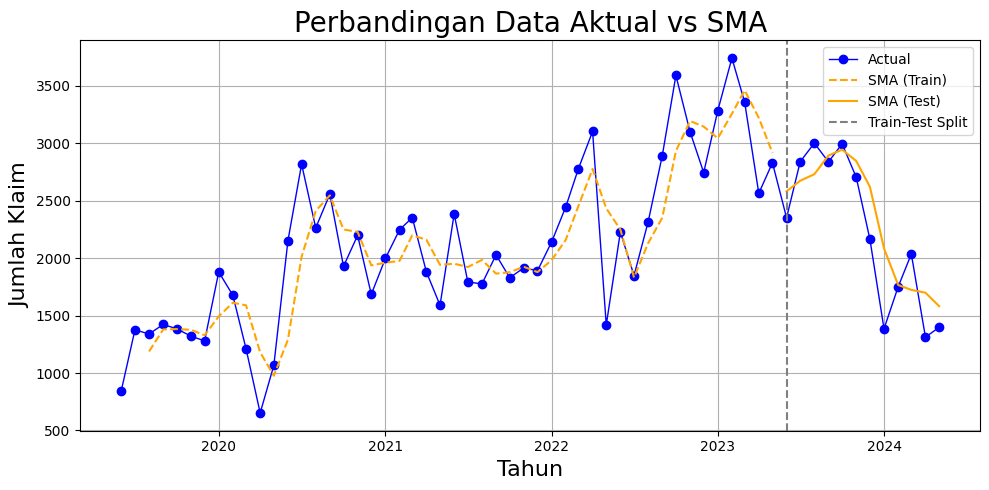

In [ ]:
# Plot Data Aktual vs SMA (Training & Testing)
plt.figure(figsize=(10, 5))
plt.plot(data['DATE'], data['JUMLAH KLAIM'], label='Actual', color='blue', marker='o', linewidth=1)
plt.plot(train_data['DATE'], sma_forecast_train, label='SMA (Train)', color='orange', linestyle='--')
plt.plot(test_data['DATE'], sma_forecast_test, label='SMA (Test)', color='orange', linestyle='-')
plt.axvline(x=test_data['DATE'].iloc[0], color='gray', linestyle='--', label='Train-Test Split')
plt.title("Perbandingan Data Aktual vs SMA", fontsize=20)
plt.xlabel("Tahun", fontsize=16)
plt.ylabel("Jumlah Klaim", fontsize=16)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


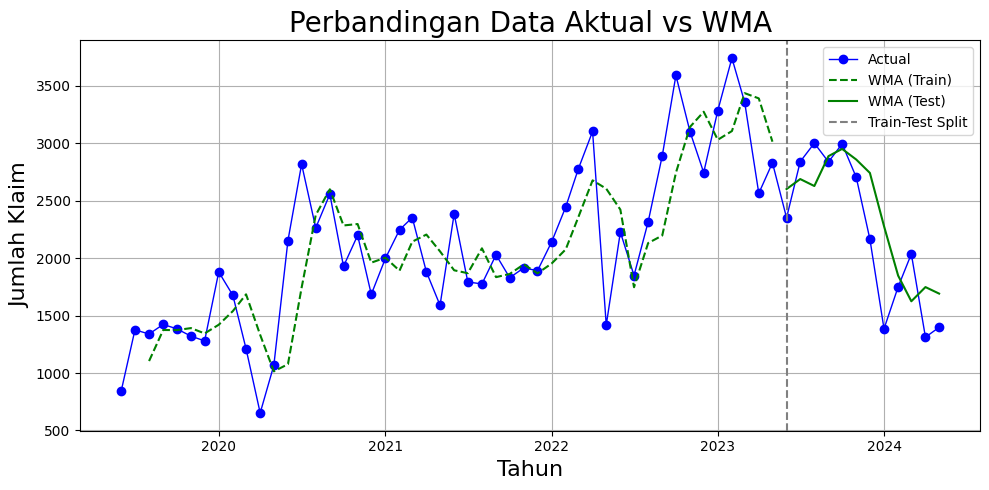

            WMA (Forecast)
Tanggal                   
2019-06-01             NaN
2019-07-01             NaN
2019-08-01          1104.3
2019-09-01          1374.6
2019-10-01          1373.9
2019-11-01          1391.2
2019-12-01          1344.8
2020-01-01          1420.5
2020-02-01          1539.4
2020-03-01          1685.3
2020-04-01          1332.2
2020-05-01          1014.5
2020-06-01          1076.9
2020-07-01          1743.5
2020-08-01          2375.5
2020-09-01          2600.3
2020-10-01          2285.2
2020-11-01          2297.5
2020-12-01          1961.2
2021-01-01          2004.6
2021-02-01          1891.3
2021-03-01          2143.9
2021-04-01          2205.9
2021-05-01          2059.3
2021-06-01          1894.7
2021-07-01          1869.4
2021-08-01          2086.1
2021-09-01          1835.1
2021-10-01          1862.7
2021-11-01          1946.7
2021-12-01          1868.0
2022-01-01          1953.5
2022-02-01          2077.0
2022-03-01          2360.5
2022-04-01          2678.1
2

In [ ]:
# Plot Data Aktual vs WMA (Training & Testing)
plt.figure(figsize=(10, 5))
plt.plot(data['DATE'], data['JUMLAH KLAIM'], label='Actual', color='blue', marker='o', linewidth=1)
plt.plot(train_data['DATE'], wma_forecast_train, label='WMA (Train)', color='green', linestyle='--')
plt.plot(test_data['DATE'], wma_forecast_test, label='WMA (Test)', color='green', linestyle='-')
plt.axvline(x=test_data['DATE'].iloc[0], color='gray', linestyle='--', label='Train-Test Split')
plt.title("Perbandingan Data Aktual vs WMA", fontsize=20)
plt.xlabel("Tahun", fontsize=16)
plt.ylabel("Jumlah Klaim", fontsize=16)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Membuat DataFrame perbandingan
comparison_table = pd.DataFrame({
    'Tanggal': data['DATE'],
    'WMA (Forecast)': wma_combined
}).set_index('Tanggal')
# Menampilkan tabel
print(comparison_table)





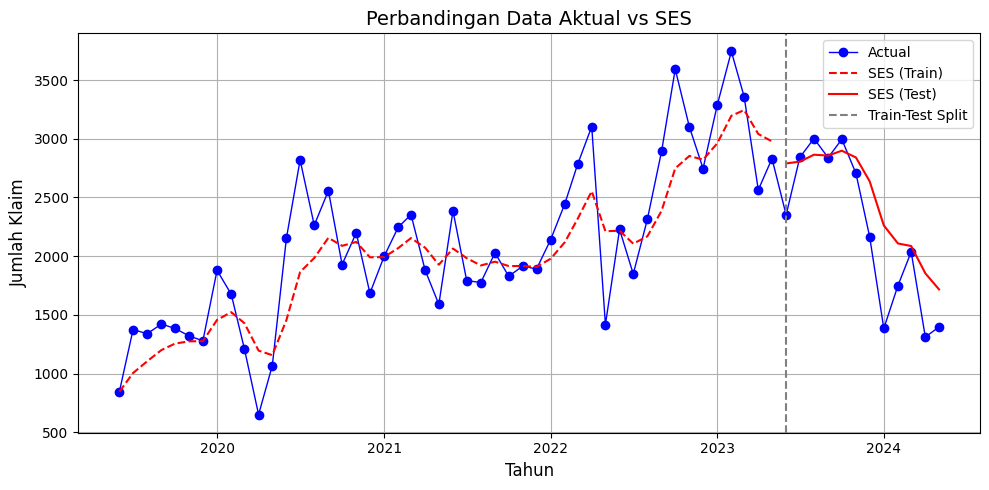

            WMA (Forecast)
Tanggal                   
2019-06-01      847.000000
2019-07-01     1005.700000
2019-08-01     1105.990000
2019-09-01     1201.093000
2019-10-01     1256.265100
2019-11-01     1275.685570
2019-12-01     1276.979899
2020-01-01     1457.885929
2020-02-01     1523.620151
2020-03-01     1429.834105
2020-04-01     1196.483874
2020-05-01     1157.638712
2020-06-01     1456.547098
2020-07-01     1865.282969
2020-08-01     1984.898078
2020-09-01     2156.828655
2020-10-01     2088.480058
2020-11-01     2121.636041
2020-12-01     1990.645229
2021-01-01     1992.851660
2021-02-01     2069.096162
2021-03-01     2154.567313
2021-04-01     2072.497119
2021-05-01     1927.747984
2021-06-01     2065.223588
2021-07-01     1983.556512
2021-08-01     1921.289558
2021-09-01     1953.602691
2021-10-01     1916.521884
2021-11-01     1916.365319
2021-12-01     1908.755723
2022-01-01     1978.429006
2022-02-01     2118.700304
2022-03-01     2317.390213
2022-04-01     2553.373149
2

In [ ]:
# Plot Data Aktual vs SES (Training & Testing)
plt.figure(figsize=(10, 5))
plt.plot(data['DATE'], data['JUMLAH KLAIM'], label='Actual', color='blue', marker='o', linewidth=1)
plt.plot(train_data['DATE'], ses_forecast_train, label='SES (Train)', color='red', linestyle='--')
plt.plot(test_data['DATE'], ses_forecast_test, label='SES (Test)', color='red', linestyle='-')
plt.axvline(x=test_data['DATE'].iloc[0], color='gray', linestyle='--', label='Train-Test Split')
plt.title("Perbandingan Data Aktual vs SES", fontsize=14)
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Jumlah Klaim", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Membuat DataFrame perbandingan
comparison_table = pd.DataFrame({
    'Tanggal': data['DATE'],
    'WMA (Forecast)': ses_combined
}).set_index('Tanggal')
# Menampilkan tabel
print(comparison_table)



In [ ]:
# Calculate MAPE per month for each method
mape_per_month = pd.DataFrame({
    'Tanggal': test_data['DATE'].reset_index(drop=True),
    'Actual': test_data['JUMLAH KLAIM'].reset_index(drop=True),
    'SMA Forecast': sma_forecast_test.reset_index(drop=True),
    'WMA Forecast': wma_forecast_test.reset_index(drop=True),
    'SES Forecast': ses_forecast_test.reset_index(drop=True),
})


# Calculate MAPE for each method
mape_per_month['MAPE (SMA) (%)'] = np.abs((mape_per_month['Actual'] - mape_per_month['SMA Forecast']) / mape_per_month['Actual']) * 100
mape_per_month['MAPE (WMA) (%)'] = np.abs((mape_per_month['Actual'] - mape_per_month['WMA Forecast']) / mape_per_month['Actual']) * 100
mape_per_month['MAPE (SES) (%)'] = np.abs((mape_per_month['Actual'] - mape_per_month['SES Forecast']) / mape_per_month['Actual']) * 100

# Calculate overall MAPE for each method
average_mape_sma = mape_per_month['MAPE (SMA) (%)'].mean()
average_mape_wma = mape_per_month['MAPE (WMA) (%)'].mean()
average_mape_ses = mape_per_month['MAPE (SES) (%)'].mean()

# Display the table
print("\nTabel Perhitungan MAPE Per Bulan untuk Semua Metode:")
print(mape_per_month[['Tanggal', 'MAPE (SMA) (%)', 'MAPE (WMA) (%)', 'MAPE (SES) (%)']])

# Display the final average MAPE
print("\nHasil Akhir MAPE Rata-rata untuk Setiap Metode:")
print(f"SMA - Average MAPE: {average_mape_sma:.2f}%")
print(f"WMA - Average MAPE: {average_mape_wma:.2f}%")
print(f"SES - Average MAPE: {average_mape_ses:.2f}%")

# Tentukan metode terbaik berdasarkan MAPE terendah
methods_mape = {
    'SMA': average_mape_sma,
    'WMA': average_mape_wma,
    'SES': average_mape_ses
}

best_method = min(methods_mape, key=methods_mape.get)
best_mape = methods_mape[best_method]

# Tampilkan metode terbaik
print(f"Metode Terbaik: {best_method} dengan MAPE rata-rata {best_mape:.2f}%")




Tabel Perhitungan MAPE Per Bulan untuk Semua Metode:
      Tanggal  MAPE (SMA) (%)  MAPE (WMA) (%)  MAPE (SES) (%)
0  2023-06-01        9.807256       10.637755       18.620152
1  2023-07-01        5.854746        5.339669        1.257931
2  2023-08-01        9.005108       12.435043        4.587491
3  2023-09-01        1.937302        1.757661        0.623405
4  2023-10-01        1.680018        1.471963        3.254709
5  2023-11-01        5.237215        5.704251        5.007107
6  2023-12-01       21.068021       26.625115       21.796379
7  2024-01-01       50.565584       64.570397       63.334058
8  2024-02-01        0.971429        5.628571       20.487068
9  2024-03-01       15.365734       20.230731        2.457859
10 2024-04-01       29.547764       33.269817       41.352638
11 2024-05-01       13.185503       21.008584       22.859988

Hasil Akhir MAPE Rata-rata untuk Setiap Metode:
SMA - Average MAPE: 13.69%
WMA - Average MAPE: 17.39%
SES - Average MAPE: 17.14%
Metode Ter


Hasil Forecasting 6 Bulan ke Depan:
     Tanggal  Hasil Forecasting
0 2024-06-01        1582.333333
1 2024-07-01        1430.777778
2 2024-08-01        1470.370370
3 2024-09-01        1494.493827
4 2024-10-01        1465.213992
5 2024-11-01        1476.692730


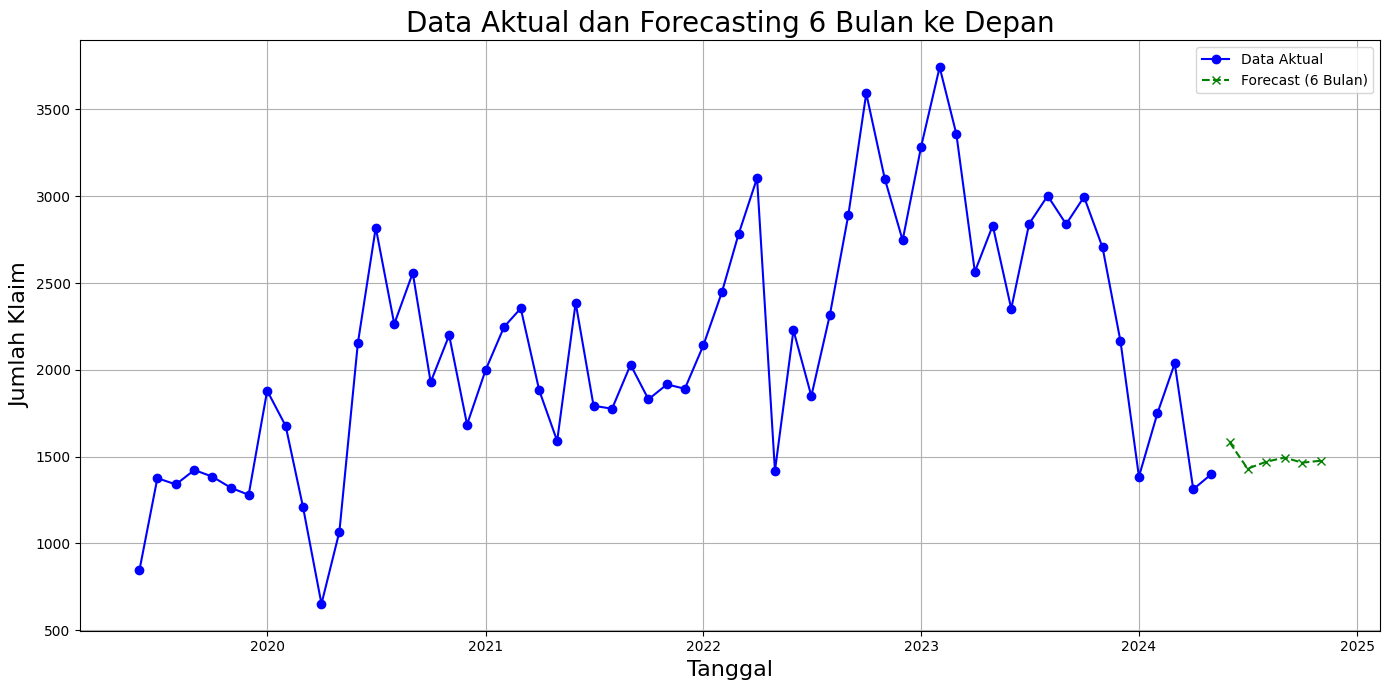

In [ ]:

# Function for Single Moving Average
def single_moving_average(series, window):
    return series.rolling(window=window).mean()

# Forecasting parameters
window = 3  # You can change the window size as needed

# Calculate moving average for existing data
data['SMA'] = single_moving_average(data['JUMLAH KLAIM'], window)

# Forecast 6 months into the future
forecast_months = 6
forecast_dates = pd.date_range(start=data['DATE'].iloc[-1] + pd.DateOffset(months=1),
                               periods=forecast_months,
                               freq='MS')

# Last 'window' values from the dataset to compute forecasts
recent_values = data['JUMLAH KLAIM'].iloc[-window:].values

# Generate forecasts iteratively
forecasts = []
for i in range(forecast_months):
    next_forecast = np.mean(recent_values)  # Moving average computation
    forecasts.append(next_forecast)
    # Update recent values by appending the latest forecast
    recent_values = np.append(recent_values[1:], next_forecast)

# Combine forecast dates and values into a DataFrame
forecast_data = pd.DataFrame({
    'DATE': forecast_dates,
    'JUMLAH KLAIM': forecasts
})

# Tabel hasil forecasting 6 bulan ke depan
forecast_table = forecast_data.copy()
forecast_table.columns = ['Tanggal', 'Hasil Forecasting']
print("\nHasil Forecasting 6 Bulan ke Depan:")
print(forecast_table)

# Append forecasted data to the original dataset for visualization
full_data = pd.concat([data, forecast_data], ignore_index=True)

# Plot data aktual dan forecasting saja
plt.figure(figsize=(14, 7))
plt.plot(data['DATE'], data['JUMLAH KLAIM'], label='Data Aktual', color='blue', marker='o')
plt.plot(forecast_data['DATE'], forecast_data['JUMLAH KLAIM'], label='Forecast (6 Bulan)', color='green', marker='x', linestyle='--')

# Customize the plot
plt.title('Data Aktual dan Forecasting 6 Bulan ke Depan', fontsize=20)
plt.xlabel('Tanggal', fontsize=16)
plt.ylabel('Jumlah Klaim', fontsize=16)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
